# Create a plot to compare WT vs translated structure and stability

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import MDAnalysis as mda
import json
import optuna
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')
from optuna.storages import JournalStorage, JournalFileStorage

### Get energies, stds, structures

In [3]:
with open('../data/proof_of_principle/consensus_estimated.json', 'r') as f:
    data = json.load(f)
    cons_e = data['consensus-hd']
cons_struct = '../data/pdbs/consensus_homeodomain.pdb'

In [21]:
with open('../data/enh/translated_energy_enh1.json', 'r') as f:
    data = json.load(f)
    wt_e = data['wt']

In [70]:
wt_e

[-2.3415768651506386, 0.07039356851323902]

## the random run

In [4]:
rand_storage = JournalStorage(JournalFileStorage('../tmp/optimize_random/optuna.log'))
rand_study  = optuna.load_study(study_name="enh_vs_random", storage=rand_storage)

/tmp/ipykernel_27464/2205900362.py:1: ExperimentalWarning: JournalStorage is experimental (supported from v3.1.0). The interface can change in the future.
  rand_storage = JournalStorage(JournalFileStorage('../tmp/optimize_random/optuna.log'))


In [5]:
rand_study_df = rand_study.trials_dataframe()

In [6]:
rand_study_df

,number,value,datetime_start,datetime_complete,duration,params_mut_0,params_mut_10,params_mut_12,params_mut_28,params_mut_32,...,params_mut_49,params_mut_54,params_mut_6,params_mut_9,user_attrs_pdb_file,user_attrs_raw_result,user_attrs_variant_seq,system_attrs_fixed_params,system_attrs_nsga2:generation,state
0,0,-2.351578,2023-11-07 11:50:29.191847,2023-11-07 13:29:37.783296,0 days 01:39:08.591449,False,False,False,False,False,...,False,False,False,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.351577546625367, 0.04217332016754325]",DKRPRTAFSSEQLARLKREFNENRYLTERRRQQLSSELGLNEAQIK...,"{'mut_0': False, 'mut_4': False, 'mut_6': Fals...",NaN,COMPLETE
1,1,-1.324088,2023-11-07 11:50:29.199595,2023-11-07 13:17:54.034750,0 days 01:27:24.835155,True,True,True,True,True,...,True,True,True,True,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-1.324088224639958, 0.0831920889020738]",VKRPHTEFSPAQHARLKREFNENRYLTEVRRQSPSSELGSNEAQIE...,"{'mut_0': True, 'mut_4': True, 'mut_6': True, ...",NaN,COMPLETE
2,2,-2.357899,2023-11-07 11:50:29.205067,2023-11-07 13:27:02.342491,0 days 01:36:33.137424,True,False,False,False,False,...,False,False,False,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.3578988809131722, 0.04068943824491914]",VKRPRTAFSSEQLARLKREFNENRYLTERRRQQLSSELGLNEAQIK...,"{'mut_0': True, 'mut_4': False, 'mut_6': False...",NaN,COMPLETE
3,3,-2.233700,2023-11-07 11:50:29.208282,2023-11-07 13:29:40.045278,0 days 01:39:10.836996,False,False,False,False,False,...,False,False,False,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.2336999357159244, 0.06073607379914235]",DKRPHTAFSSEQLARLKREFNENRYLTERRRQQLSSELGLNEAQIK...,"{'mut_0': False, 'mut_4': True, 'mut_6': False...",NaN,COMPLETE
4,4,-2.370113,2023-11-07 11:50:29.223311,2023-11-07 13:27:06.985025,0 days 01:36:37.761714,False,False,False,False,False,...,False,False,True,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.3701131056156735, 0.031043026614884933]",DKRPRTEFSSEQLARLKREFNENRYLTERRRQQLSSELGLNEAQIK...,"{'mut_0': False, 'mut_4': False, 'mut_6': True...",NaN,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,287,NaN,2023-11-08 07:43:54.609282,2023-11-08 07:44:04.583106,0 days 00:00:09.973824,False,True,False,True,False,...,False,False,True,False,NaN,NaN,NaN,NaN,5.0,PRUNED
288,288,-2.326637,2023-11-08 07:44:04.588999,2023-11-08 09:06:47.801577,0 days 01:22:43.212578,False,False,False,False,False,...,True,False,True,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.3266374017030023, 0.046000119494897074]",DKRPRTEFSSEQLARLKREFNENRYLTERRRQQLSSELGLNEAQIK...,NaN,5.0,COMPLETE
289,289,-1.661527,2023-11-08 07:46:29.732365,2023-11-08 09:09:10.399971,0 days 01:22:40.667606,False,True,False,False,False,...,False,False,True,True,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-1.6615268461476087, 0.0767809729176405]",DKRPHTEFSPAQLARLKREFNENRYLTERRRQQPSSELGLNEAQIK...,NaN,5.0,COMPLETE
290,290,-2.299112,2023-11-08 07:53:56.812175,2023-11-08 09:15:15.296400,0 days 01:21:18.484225,False,True,False,False,False,...,False,False,True,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.2991119048897057, 0.07239470632173227]",DKRPRTEFSSAQLARLKREFNENRYLTERRRQQLSSELGLNEAQIK...,NaN,5.0,COMPLETE


In [8]:
rand_study_df.sort_values(by='value')

,number,value,datetime_start,datetime_complete,duration,params_mut_0,params_mut_10,params_mut_12,params_mut_28,params_mut_32,...,params_mut_49,params_mut_54,params_mut_6,params_mut_9,user_attrs_pdb_file,user_attrs_raw_result,user_attrs_variant_seq,system_attrs_fixed_params,system_attrs_nsga2:generation,state
232,232,-2.419070,2023-11-08 04:30:31.474055,2023-11-08 05:53:23.810573,0 days 01:22:52.336518,False,True,False,True,False,...,False,False,True,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.419069682945624, 0.0614550718431811]",DKRPHTEFSSAQLARLKREFNENRYLTEVRRQQLSSELGLNEAQIE...,NaN,4.0,COMPLETE
8,8,-2.406350,2023-11-07 13:17:54.039104,2023-11-07 14:41:43.840654,0 days 01:23:49.801550,False,False,False,True,False,...,False,False,False,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.4063496963768447, 0.05898475977934986]",DKRPRTAFSSEQLARLKREFNENRYLTEVRRQQLSSELGLNEAQIK...,"{'mut_0': False, 'mut_4': False, 'mut_6': Fals...",NaN,COMPLETE
274,274,-2.392561,2023-11-08 06:29:15.947237,2023-11-08 07:53:56.806001,0 days 01:24:40.858764,False,True,False,True,False,...,False,False,True,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.392561190803303, 0.06199458428499113]",DKRPRTEFSSAQLARLKREFNENRYLTEVRRQQLSSELGLNEAQIE...,NaN,5.0,COMPLETE
271,271,-2.377018,2023-11-08 06:19:55.840670,2023-11-08 07:43:54.597737,0 days 01:23:58.757067,True,True,False,False,False,...,False,False,True,True,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.3770182862629357, 0.03173497509466323]",VKRPRTEFSPAQLARLKREFNENRYLTERRRQQLSSELGLNEAQIK...,NaN,4.0,COMPLETE
4,4,-2.370113,2023-11-07 11:50:29.223311,2023-11-07 13:27:06.985025,0 days 01:36:37.761714,False,False,False,False,False,...,False,False,True,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.3701131056156735, 0.031043026614884933]",DKRPRTEFSSEQLARLKREFNENRYLTERRRQQLSSELGLNEAQIK...,"{'mut_0': False, 'mut_4': False, 'mut_6': True...",NaN,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,282,NaN,2023-11-08 07:36:33.030967,2023-11-08 07:36:37.582125,0 days 00:00:04.551158,False,True,False,True,False,...,False,False,True,False,NaN,NaN,NaN,NaN,5.0,PRUNED
283,283,NaN,2023-11-08 07:36:37.591097,2023-11-08 07:36:45.111737,0 days 00:00:07.520640,False,False,False,True,False,...,True,False,True,False,NaN,NaN,NaN,NaN,5.0,PRUNED
284,284,NaN,2023-11-08 07:36:45.119691,2023-11-08 07:36:50.560073,0 days 00:00:05.440382,False,True,False,True,False,...,False,False,True,False,NaN,NaN,NaN,NaN,5.0,PRUNED
285,285,NaN,2023-11-08 07:36:50.564711,2023-11-08 07:36:54.849959,0 days 00:00:04.285248,False,True,False,False,False,...,False,False,True,False,NaN,NaN,NaN,NaN,5.0,PRUNED


In [9]:
rand_e = rand_study_df.loc[1, 'user_attrs_raw_result']
rand_struct = rand_study_df.loc[1, 'user_attrs_pdb_file']+'/ensemble_replicate_0.pdb'
wt_struct = rand_study_df.loc[0, 'user_attrs_pdb_file']+'/ensemble_replicate_0.pdb'

In [10]:
rand_e_best = rand_study.best_trial.user_attrs['raw_result']
rand_struct_best = rand_study.best_trial.user_attrs['pdb_file']+'/ensemble_replicate_0.pdb'

### The translated seq

In [11]:
with open('../data/enh/translated_energy_enh1.json', 'r') as f:
    data = json.load(f)
    trans_e = data['trans']
trans_struct = '../data/enh/initial_estimate/trans/ensemble_replicate_0.pdb'

In [14]:
opt_storage = JournalStorage(JournalFileStorage('../data/enh/optimize_enh1/optuna.log'))
opt_study  = optuna.load_study(study_name="enh_vs_translate", storage=opt_storage)
opt_study_df = opt_study.trials_dataframe()

/tmp/ipykernel_27464/787137964.py:1: ExperimentalWarning: JournalStorage is experimental (supported from v3.1.0). The interface can change in the future.
  opt_storage = JournalStorage(JournalFileStorage('../data/enh/optimize_enh1/optuna.log'))


In [15]:
opt_study_df

,number,value,datetime_start,datetime_complete,duration,params_mut_0,params_mut_13,params_mut_17,params_mut_20,params_mut_21,...,params_mut_35,params_mut_42,params_mut_58,params_mut_8,params_mut_9,user_attrs_pdb_file,user_attrs_raw_result,user_attrs_variant_seq,system_attrs_nsga2:generation,state
0,0,-2.301770,2023-11-06 12:55:28.670354,2023-11-06 14:21:49.110332,0 days 01:26:20.439978,False,True,False,False,False,...,False,True,False,True,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.3017697216756305, 0.04183575004597279]",DKRPRTAFTSEQLQRLKREFNENRYLTEQRRQQLSSELGLNESQIK...,0,COMPLETE
1,1,-2.282359,2023-11-06 12:55:28.672431,2023-11-06 14:20:34.415238,0 days 01:25:05.742807,False,True,False,False,False,...,False,True,False,True,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.2823591547778097, 0.051945543124933394]",DKRPRTAFTSEQLQRLKREFNENRYLTEQRRQQLSSELGLNESQIK...,0,COMPLETE
2,2,NaN,2023-11-06 12:55:28.674071,2023-11-06 12:55:36.047789,0 days 00:00:07.373718,False,True,False,False,False,...,False,True,False,True,False,NaN,NaN,NaN,0,PRUNED
3,3,NaN,2023-11-06 12:55:28.681829,2023-11-06 12:55:31.136549,0 days 00:00:02.454720,False,True,False,False,False,...,False,True,False,True,False,NaN,NaN,NaN,0,PRUNED
4,4,NaN,2023-11-06 12:55:28.679134,2023-11-06 12:55:35.648442,0 days 00:00:06.969308,False,True,False,False,False,...,False,True,False,True,False,NaN,NaN,NaN,0,PRUNED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,329,NaN,2023-11-07 08:34:40.590741,2023-11-07 08:34:49.642777,0 days 00:00:09.052036,True,False,True,False,True,...,False,False,False,False,False,NaN,NaN,NaN,6,PRUNED
330,330,-2.444614,2023-11-07 08:34:49.649722,2023-11-07 09:55:46.716975,0 days 01:20:57.067253,True,True,True,False,True,...,True,False,False,True,True,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.4446138686253116, 0.10610646336501381]",EKRPRTAFTAEQLQRLKAEFNANRYLTERRRQELARELGLNEAQIK...,6,COMPLETE
331,331,NaN,2023-11-07 09:38:18.526507,2023-11-07 09:38:18.906860,0 days 00:00:00.380353,False,False,True,False,True,...,False,False,True,True,True,NaN,NaN,NaN,6,PRUNED
332,332,NaN,2023-11-07 09:38:18.913615,2023-11-07 09:38:29.043948,0 days 00:00:10.130333,True,False,True,False,True,...,False,False,False,True,False,NaN,NaN,NaN,6,PRUNED


In [16]:
opt_study_df.sort_values(by='value')

,number,value,datetime_start,datetime_complete,duration,params_mut_0,params_mut_13,params_mut_17,params_mut_20,params_mut_21,...,params_mut_35,params_mut_42,params_mut_58,params_mut_8,params_mut_9,user_attrs_pdb_file,user_attrs_raw_result,user_attrs_variant_seq,system_attrs_nsga2:generation,state
231,231,-2.500861,2023-11-07 03:00:08.150847,2023-11-07 04:21:31.320721,0 days 01:21:23.169874,True,False,True,False,True,...,False,False,False,True,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.5008611538882186, 0.03565757345110494]",EKRPRTAFTSEQLARLKAEFNANRYLTEQRRQELASELGLNEAQIK...,4,COMPLETE
248,248,-2.498834,2023-11-07 04:21:35.631711,2023-11-07 05:44:39.901563,0 days 01:23:04.269852,True,False,True,False,True,...,False,False,False,False,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.4988338339593037, 0.042810193667988564]",EKRPRTAFSSEQLARLKAEFNANRYLTERRRQELASELGLNEAQIK...,5,COMPLETE
233,233,-2.494665,2023-11-07 03:00:57.676166,2023-11-07 04:22:59.321997,0 days 01:22:01.645831,True,False,True,False,True,...,False,False,False,True,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.494664618219763, 0.052502507593727404]",EKRPRTAFTSEQLARLKAEFNANRYLTERRRQELASELGLNEAQIK...,4,COMPLETE
250,250,-2.493251,2023-11-07 04:28:37.321141,2023-11-07 05:49:55.094083,0 days 01:21:17.772942,True,False,True,False,True,...,False,False,False,True,True,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.493251184309053, 0.04443470364788813]",EKRPRTAFTAEQLARLKAEFNANRYLTERRRQELASELGLNEAQIK...,5,COMPLETE
140,140,-2.488530,2023-11-06 20:05:08.021003,2023-11-06 21:27:19.621446,0 days 01:22:11.600443,False,False,True,False,True,...,False,False,False,True,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.4885295940819194, 0.027262266978526396]",DKRPRTAFTSEQLARLKAEFNANRYLTERRRQELASELGLNEAQIK...,2,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,326,NaN,2023-11-07 08:31:55.598983,2023-11-07 08:31:56.295609,0 days 00:00:00.696626,False,False,True,False,True,...,False,False,False,True,True,NaN,NaN,NaN,6,PRUNED
328,328,NaN,2023-11-07 08:34:33.099136,2023-11-07 08:34:40.580099,0 days 00:00:07.480963,True,False,True,False,True,...,False,False,False,True,False,NaN,NaN,NaN,6,PRUNED
329,329,NaN,2023-11-07 08:34:40.590741,2023-11-07 08:34:49.642777,0 days 00:00:09.052036,True,False,True,False,True,...,False,False,False,False,False,NaN,NaN,NaN,6,PRUNED
331,331,NaN,2023-11-07 09:38:18.526507,2023-11-07 09:38:18.906860,0 days 00:00:00.380353,False,False,True,False,True,...,False,False,True,True,True,NaN,NaN,NaN,6,PRUNED


In [17]:
opt_e_best = opt_study.best_trial.user_attrs['raw_result']
opt_struct_best = opt_study.best_trial.user_attrs['pdb_file']+'/ensemble_replicate_0.pdb'

### Make plot

In [23]:
data = [
    dict(
        name='WT',
        score=wt_e[0],
        score_std=wt_e[1],
        struct=wt_struct
    ), 
    dict(
        name='Cons. Engineered',
        score=cons_e[0],
        score_std=cons_e[1],
        struct=cons_struct
    ), 
    dict(
        name='NOMELT Raw',
        score=trans_e[0],
        score_std=trans_e[1],
        struct=trans_struct
    ), 
    dict(
        name='NOMELT Opt.',
        score=opt_e_best[0],
        score_std=opt_e_best[1],
        struct=opt_struct_best
    ),
    dict(
        name='Random',
        score=rand_e[0],
        score_std=rand_e[1],
        struct=rand_struct
    ),
    dict(
        name='Random Opt.',
        score=rand_e_best[0],
        score_std=rand_e_best[1],
        struct=rand_struct_best
    ),
]

In [24]:
data

[{'name': 'WT',
  'score': -2.3415768651506386,
  'score_std': 0.07039356851323902,
  'struct': '/mmfs1/gscratch/cheme/usr/evankomp/repos/nomelt/tmp/optimize_random/enh_vs_random/0/ensemble_replicate_0.pdb'},
 {'name': 'Cons. Engineered',
  'score': -2.5816726707033424,
  'score_std': 0.05701624801654463,
  'struct': '../data/pdbs/consensus_homeodomain.pdb'},
 {'name': 'NOMELT Raw',
  'score': -2.3605543743488373,
  'score_std': 0.04831407537611501,
  'struct': '../data/enh/initial_estimate/trans/ensemble_replicate_0.pdb'},
 {'name': 'NOMELT Opt.',
  'score': -2.5008611538882186,
  'score_std': 0.03565757345110494,
  'struct': '/mmfs1/gscratch/cheme/usr/evankomp/repos/nomelt/tmp/optimize_enh1/enh_vs_translate/5950877656627385155/ensemble_replicate_0.pdb'},
 {'name': 'Random',
  'score': -1.324088224639958,
  'score_std': 0.0831920889020738,
  'struct': '/mmfs1/gscratch/cheme/usr/evankomp/repos/nomelt/tmp/optimize_random/enh_vs_random/151688420900776217/ensemble_replicate_0.pdb'},
 {'na

In [25]:
data = pd.DataFrame(data)

In [26]:
data['score'] = data['score']*-1

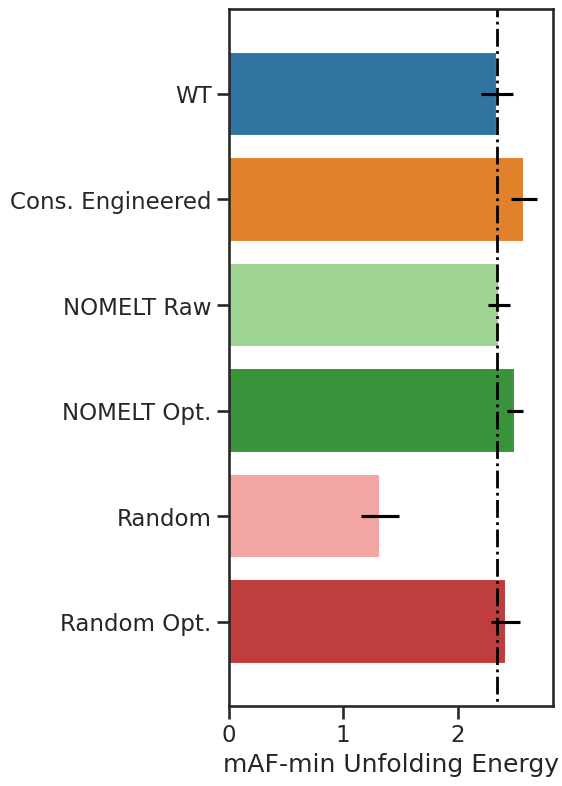

In [27]:
fig, ax = plt.subplots(figsize=(3,8))
fig.tight_layout(rect=[0,0,1.5,1]) 
custom_palette = ["#1f77b4", "#ff7f0e", "#98df8a", "#2ca02c", '#ff9896', '#d62728']
sns.set_palette(custom_palette)
sns.barplot(
    data=data,
    y='name',
    x='score',
    xerr=data['score_std']*2,
    errwidth=2,
    palette=custom_palette,
    ax=ax
)

ax.vlines(x=-wt_e[0], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', ls='-.', transform=ax.get_xaxis_transform(), lw=2)
ax.set_ylabel('')
ax.set_xlabel('mAF-min Unfolding Energy')
plt.savefig('./figures/mAF_scores.png', dpi=400, bbox_inches='tight')

### Get some statistics

In [28]:
import scipy.stats

In [29]:
scipy.stats.ttest_ind_from_stats(wt_e[0], wt_e[1], 25, cons_e[0], cons_e[1], 25, alternative='greater')

Ttest_indResult(statistic=13.25213919747475, pvalue=5.884699097309159e-18)

In [30]:
scipy.stats.ttest_ind_from_stats(wt_e[0], wt_e[1], 25, opt_e_best[0], opt_e_best[1], 25, alternative='greater')

Ttest_indResult(statistic=10.092839799565207, pvalue=9.35009385714862e-14)

### Show structures now

align structures

In [31]:
from Bio.PDB import *
import nglview as nv
import ipywidgets

get sequences from mda

In [32]:
# Get sequence
three_to_one = {
    'ALA': 'A', 'ARG': 'R', 'ASN': 'N', 'ASP': 'D',
    'CYS': 'C', 'GLU': 'E', 'GLN': 'Q', 'GLY': 'G',
    'HIS': 'H', 'ILE': 'I', 'LEU': 'L', 'LYS': 'K',
    'MET': 'M', 'PHE': 'F', 'PRO': 'P', 'SER': 'S',
    'THR': 'T', 'TRP': 'W', 'TYR': 'Y', 'VAL': 'V'
}

def do_one(u):
    sequence = ''
    for res in u.residues:
        sequence += three_to_one.get(res.resname, 'X')
    return sequence

In [33]:
data['seq'] = data['struct'].apply(lambda f: do_one(mda.Universe(f)))

In [34]:
from nomelt.thermo_estimation.optimizer import OptTrajSuperimposer

/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [35]:
imposer = OptTrajSuperimposer(data['seq'], data['struct'], values=range(len(data)))

In [36]:
imposed_structs = imposer.run()

/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:775: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"


In [37]:
views = {}
for i, (_, s) in enumerate(data.iterrows()):
    print(s['name'])
    u = mda.Universe(imposed_structs[i])
    view = nv.show_mdanalysis(u)
    views[s['name']] = view

/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:451: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:451: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:451: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


WT
Cons. Engineered
NOMELT Raw
NOMELT Opt.
Random
Random Opt.


/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:451: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:451: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:451: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


In [38]:
views['WT']

NGLWidget()

In [39]:
views['Cons. Engineered']

NGLWidget()

In [47]:
views['NOMELT Raw']

NGLWidget()

In [40]:
views['NOMELT Opt.']

NGLWidget()

In [49]:
views['Random']

NGLWidget()

In [50]:
views['Random Opt.']

NGLWidget()

Align the good sequences such that they can be compared

In [51]:
from Bio import pairwise2
from Bio.Align import substitution_matrices
mat = substitution_matrices.load('BLOSUM62')

In [46]:
wt_seq = "DKRPRTAFSSEQLARLKREFNENRYLTERRRQQLSSELGLNEAQIKIWFQNKRAKIKK"
cons =   "RRKRTTFTKEQLEELEELFEKNRYPSAEEREELAKKLGLTERQVKVWFQNRRAKEKK"
opt = opt_study.best_trial.user_attrs['variant_seq']

In [69]:
opt

'EKRPRTAFTSEQLARLKAEFNANRYLTEQRRQELASELGLNEAQIKIWFQNKRAKIKK'

In [66]:
alignments1 = pairwise2.align.globalds(wt_seq, cons, mat, -2, -1, one_alignment_only=True, penalize_extend_when_opening=False,
                penalize_end_gaps=True)
alignments2 = pairwise2.align.globalds(wt_seq, opt, mat, -2, -1, one_alignment_only=True, penalize_extend_when_opening=False,
                penalize_end_gaps=True)

# Print the alignments
alignment1 = alignments1[0]
alignment2 = alignments2[0]

In [67]:
alignment1

Alignment(seqA='DKRPRTAFSSEQLARLKRE-FNE-NRYLT-ERRRQQLSSELGLNEAQIKIWFQNKRAKIKK', seqB='-RRKRTTFTKEQLEELE-ELF-EKNRYPSAE-EREELAKKLGLTERQVKVWFQNRRAKEKK', score=164.0, start=0, end=61)

In [68]:
alignment2

Alignment(seqA='DKRPRTAFSSEQLARLKREFNENRYLTERRRQQLSSELGLNEAQIKIWFQNKRAKIKK', seqB='EKRPRTAFTSEQLARLKAEFNANRYLTEQRRQELASELGLNEAQIKIWFQNKRAKIKK', score=263.0, start=0, end=58)

wt              DKRPRTAFSSEQLARLKREFNENRYLTERRRQQLSSELGLNEAQIKIWFQNKRAKIKK
opt             EKRPRTAFTSEQLARLKAEFNANRYLTEQRRQELASELGLNEAQIKIWFQNKRAKIKK
cons            -RRKRTTFTKEQLEELEELFEKNRYPSAEEREELAKKLGLTERQVKVWFQNRRAKEKK
                 :* **:*:.*** .*:  *: *** : ..*::*:.:***.* *:*:****:*** **